In [4]:
install.packages("kknn")
library(repr)
library(tidyverse)
library(tidymodels)
library(janitor)


temp <- tempfile()
download.file("https://archive.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip", temp)
student_data <- unz(temp, "data.csv")
hd <- read_delim(student_data, delim=";")
hd

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── t

Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,⋯,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,17,5,171,1,1,122.0,1,19,12,⋯,0,0,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,15,1,9254,1,1,160.0,1,1,3,⋯,0,6,6,6,13.66667,0,13.9,-0.3,0.79,Graduate
1,1,5,9070,1,1,122.0,1,37,37,⋯,0,6,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,17,2,9773,1,1,122.0,1,38,37,⋯,0,6,10,5,12.40000,0,9.4,-0.8,-3.12,Graduate
2,39,1,8014,0,1,100.0,1,37,38,⋯,0,6,6,6,13.00000,0,13.9,-0.3,0.79,Graduate
2,39,1,9991,0,19,133.1,1,37,37,⋯,0,5,17,5,11.50000,5,16.2,0.3,-0.92,Graduate
1,1,1,9500,1,1,142.0,1,19,38,⋯,0,8,8,8,14.34500,0,15.5,2.8,-4.06,Graduate
1,18,4,9254,1,1,119.0,1,37,37,⋯,0,5,5,0,0.00000,0,15.5,2.8,-4.06,Dropout
1,1,3,9238,1,1,137.0,62,1,1,⋯,0,6,7,6,14.14286,0,16.2,0.3,-0.92,Graduate


In [5]:

hd <- clean_names(hd)
head(hd)

marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification_grade,nacionality,mothers_qualification,fathers_qualification,⋯,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,17,5,171,1,1,122.0,1,19,12,⋯,0,0,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,15,1,9254,1,1,160.0,1,1,3,⋯,0,6,6,6,13.66667,0,13.9,-0.3,0.79,Graduate
1,1,5,9070,1,1,122.0,1,37,37,⋯,0,6,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,17,2,9773,1,1,122.0,1,38,37,⋯,0,6,10,5,12.40000,0,9.4,-0.8,-3.12,Graduate
2,39,1,8014,0,1,100.0,1,37,38,⋯,0,6,6,6,13.00000,0,13.9,-0.3,0.79,Graduate
2,39,1,9991,0,19,133.1,1,37,37,⋯,0,5,17,5,11.50000,5,16.2,0.3,-0.92,Graduate


In [6]:
students_data <- hd |>
    mutate(target = as_factor(target)) |>
    filter(course == 9119) |>
    select (target,course, previous_qualification , unemployment_rate , inflation_rate , gdp)
students_data

target,course,previous_qualification,unemployment_rate,inflation_rate,gdp
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dropout,9119,10,7.6,2.6,0.32
Enrolled,9119,1,15.5,2.8,-4.06
Enrolled,9119,1,13.9,-0.3,0.79
Dropout,9119,3,13.9,-0.3,0.79
Dropout,9119,1,7.6,2.6,0.32
Dropout,9119,39,16.2,0.3,-0.92
Dropout,9119,1,16.2,0.3,-0.92
Enrolled,9119,19,10.8,1.4,1.74
Dropout,9119,1,8.9,1.4,3.51


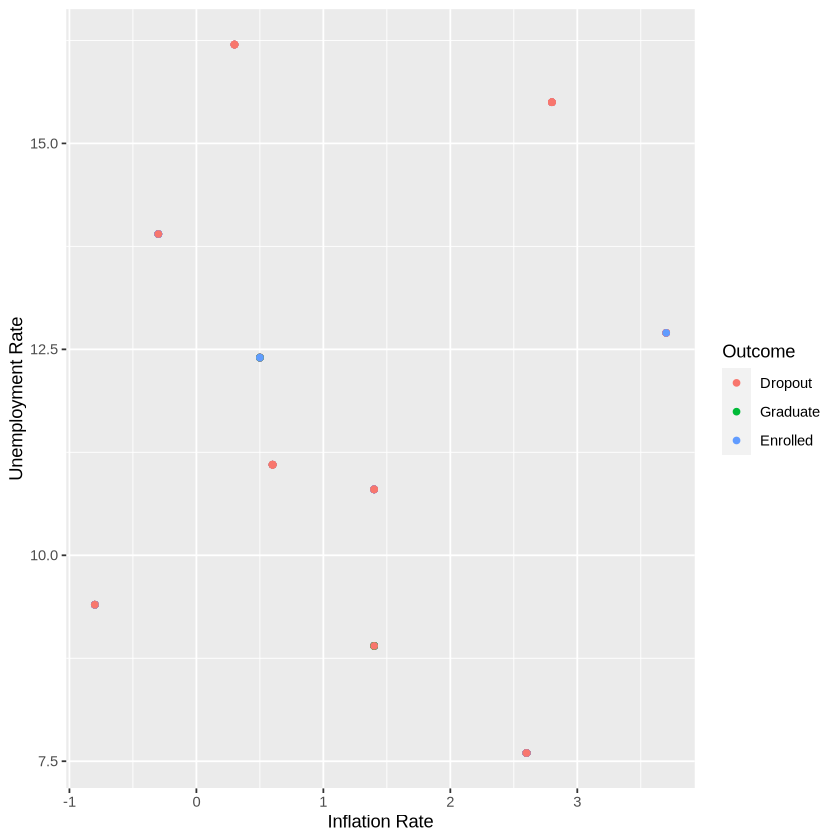

In [15]:
students_data_scatter_plot <- ggplot(students_data, aes(x = inflation_rate, y = unemployment_rate, color = target)) +
                                 geom_point() +
                                 labs(x = "Inflation Rate", y = "Unemployment Rate", color = "Outcome", tittle = "Ralationship between Inflation rate and unemployment_rate") 
students_data_scatter_plot
# <- ggplot(students_summary, aes(x = mean_inflatation_rate, y = mean_unemployment_rate, fill = target)) +
#                          geom_point() +
#                          labs(x = "Average Inflation Rate", y = "Average Unemployment Rate", fill = "Outcome", tittle = "Ralationship between Inflation rate and unemployment_rate"


In [7]:
students_mean <- students_data |>
                 select (unemployment_rate,inflation_rate , gdp) |>
                 map_df(mean)

students_mean 

students_count <-  students_data |>
             group_by(target) |>
             summarize(count = n()) 
students_count  

students_summary <- students_data |> 
              group_by(target) |>
              summarize (mean_unemployment_rate = mean(unemployment_rate) , mean_inflatation_rate = mean(inflation_rate))
students_summary

unemployment_rate,inflation_rate,gdp
<dbl>,<dbl>,<dbl>
10.71529,1.227059,0.6195882


target,count
<fct>,<int>
Dropout,92
Graduate,14
Enrolled,64


target,mean_unemployment_rate,mean_inflatation_rate
<fct>,<dbl>,<dbl>
Dropout,10.894565,1.261957
Graduate,9.907143,1.100000
Enrolled,10.634375,1.204687
